In [172]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [131]:
train=pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [133]:
pd.to_datetime(train['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [134]:
train['Year']=pd.to_datetime(train['datetime']).dt.year
train['Month']=pd.to_datetime(train['datetime']).dt.month
train['Day']=pd.to_datetime(train['datetime']).dt.day
train['Hour']=pd.to_datetime(train['datetime']).dt.hour
train['Minute']=pd.to_datetime(train['datetime']).dt.minute
train['Second']=pd.to_datetime(train['datetime']).dt.second

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Year        10886 non-null  int64  
 13  Month       10886 non-null  int64  
 14  Day         10886 non-null  int64  
 15  Hour        10886 non-null  int64  
 16  Minute      10886 non-null  int64  
 17  Second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB


<AxesSubplot:xlabel='Second', ylabel='count'>

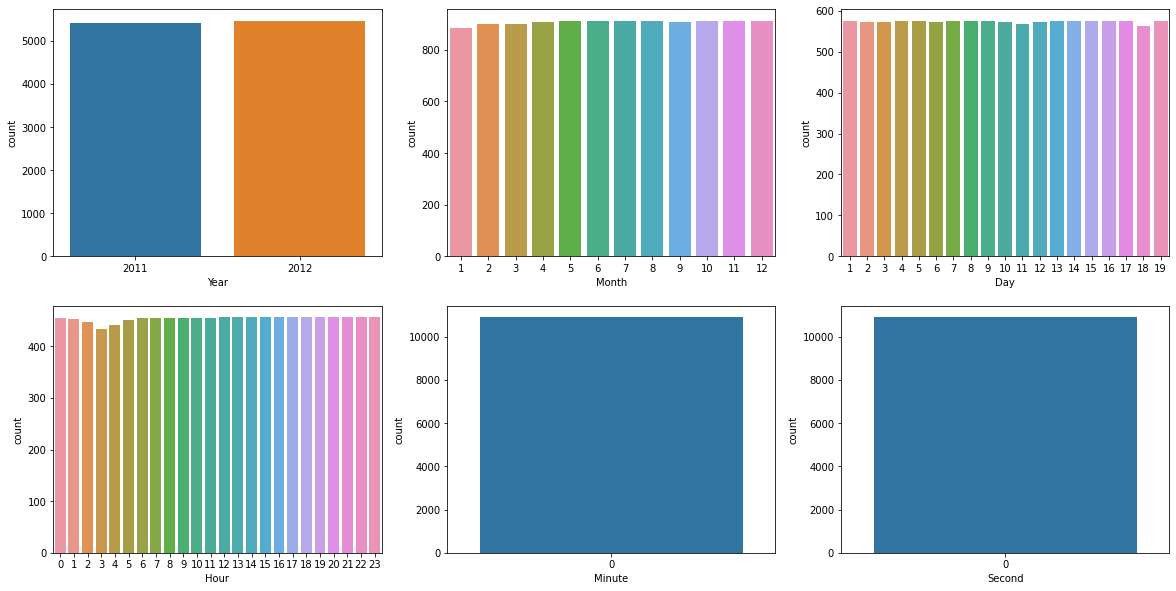

In [136]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='Year',data=train,ax=axes[0,0])
sns.countplot(x='Month',data=train,ax=axes[0,1])
sns.countplot(x='Day',data=train,ax=axes[0,2])
sns.countplot(x='Hour',data=train,ax=axes[1,0])
sns.countplot(x='Minute',data=train,ax=axes[1,1])
sns.countplot(x='Second',data=train,ax=axes[1,2])

In [137]:
train['count'].shape

(10886,)

In [141]:
train['Date']=pd.to_datetime(train['datetime']).dt.date
train['Date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: Date, Length: 10886, dtype: object

In [197]:
X=train.drop(['datetime','casual','registered','Minute','Second','Date','count'],axis=1)

In [198]:
X.shape

(10886, 12)

In [199]:
X_train,X_test,y_train,y_test=train_test_split(X,train['count'],test_size=0.25,random_state=2022)

In [200]:
skmodel=LinearRegression()
skmodel.fit(X_train,y_train)
y_pred=skmodel.predict(X_test)
print("예측값:",y_pred)
difference=y_test-y_pred
print("차이값:",difference)

예측값: [357.56182972 206.55182649 177.26589548 ... 149.08951476 124.00332157
 161.56286244]
차이값: 6609     -25.561830
6157    -126.551826
4618     194.734105
613       22.217565
10331    -59.603204
            ...    
6889     125.383473
2146     279.458181
6840     454.910485
4328      72.996678
9881    -158.562862
Name: count, Length: 2722, dtype: float64


In [201]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**0.5
print(mse)
print(rmse)

19612.31241193253
140.04396599615612


In [202]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [203]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Year,Month,Day,Hour
6609,1,0,1,1,25.42,31.060,35,30.0026,2012,3,12,16
6157,1,0,0,1,6.56,6.820,40,19.0012,2012,2,12,19
4618,4,0,0,1,14.76,17.425,46,11.0014,2011,11,5,12
613,1,0,1,1,9.02,9.090,32,39.0007,2011,2,8,17
10331,4,0,1,2,13.12,16.665,66,7.0015,2012,11,15,21
...,...,...,...,...,...,...,...,...,...,...,...,...
6889,2,0,1,1,16.40,20.455,37,16.9979,2012,4,5,9
2146,2,0,1,1,22.96,26.515,73,19.9995,2011,5,16,8
6840,2,0,1,1,13.94,18.180,57,0.0000,2012,4,3,8
4328,4,0,1,2,22.14,25.760,88,30.0026,2011,10,12,9


In [204]:
y_test

6609     332
6157      80
4618     372
613      176
10331    224
        ... 
6889     351
2146     394
6840     604
4328     197
9881       3
Name: count, Length: 2722, dtype: int64

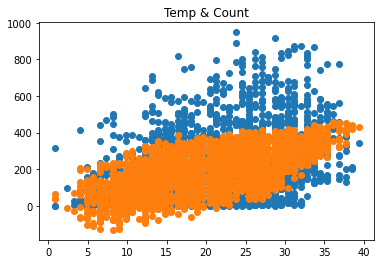

In [206]:
plt.scatter(X_test.iloc[:,4],y_test)
plt.scatter(X_test.iloc[:,4],y_pred)
plt.title('Temp & Count')
plt.show()

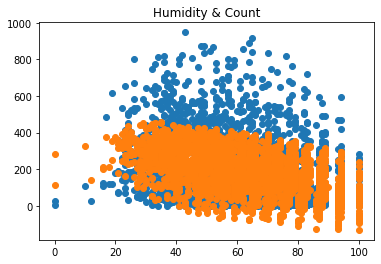

In [207]:
plt.scatter(X_test.iloc[:,6],y_test)
plt.scatter(X_test.iloc[:,6],y_pred)
plt.title('Humidity & Count')
plt.show()